In [1]:
import matplotlib.pyplot as plt
import numpy as np

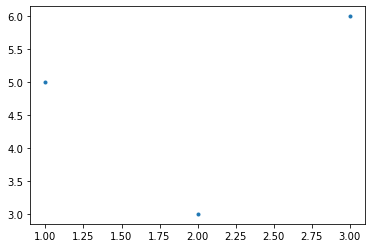

In [2]:
plt.plot([1,2,3],[5,3,6],'.')

# Regression
#### scikit-learn

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
data = np.array([[1,2,3,4],[5.8,2.5,1.4,-0.8]])
#관례상 X는 대문자 y는 소문자로 작성한다.
X = [[i] for i in data[0]]
y = [[i] for i in data[1]]

In [5]:
X

[[1.0], [2.0], [3.0], [4.0]]

In [6]:
y

[[5.8], [2.5], [1.4], [-0.8]]

In [7]:
reg=LinearRegression()
reg.fit(X,y)
reg.predict(X) #?????? 교수님과 다르게 나옴

array([[ 5.36],
       [ 3.27],
       [ 1.18],
       [-0.91]])

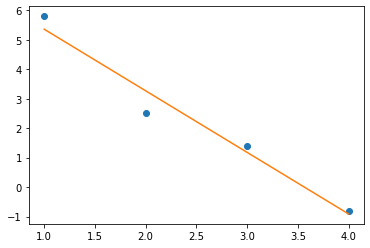

In [8]:
plt.plot(X,y,'o')
plt.plot(X,reg.predict(X))

In [9]:
#핵심!!!
reg=LinearRegression() #linear regression을 하겠다, 변수 지정
reg.fit(X,y) #fitting을 해라 x, y를 가지고 #교수님과 다른결과

LinearRegression()

In [10]:
reg.coef_ , reg.intercept_ #기울기와 절편 값을 출력해라

(array([[-2.09]]), array([7.45]))

In [11]:
x_new=[[5]] #다른 입력값을 저장
reg.predict(x_new) # x_new를 입력했을 때 예측하는 값을 출력해라

array([[-3.]])

# Polynomial regression

In [12]:
N = 50
x = np.linspace(-2, 1, N) #-2부터 1까지 50간격으로
y = 0.8*x**2 + x + np.random.rand(N)

In [13]:
X=[[i] for i in x]
Y=[[i] for i in y]

In [14]:
from sklearn.preprocessing import PolynomialFeatures #전처리 #피쳐를 다항식으로 변환해주는..
poly = PolynomialFeatures(degree=2, include_bias=False) #degree는 몇승"?관련? 인듯, bias는 상수값? 관련인듯
X_poly2 = poly.fit_transform(X)

In [15]:
reg2=LinearRegression()
reg2.fit(X_poly2,Y)
reg2.intercept_, reg2.coef_

(array([0.53552647]), array([[1.12183648, 0.78372903]]))

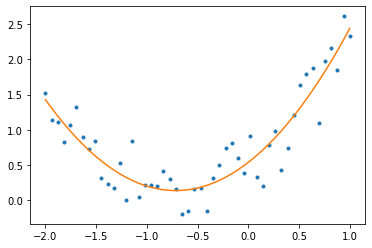

In [16]:
plt.plot(x,y,'.')
plt.plot(x,reg2.predict(X_poly2))

In [18]:
from sklearn.preprocessing import PolynomialFeatures #전처리 #피쳐를 다항식으로 변환해주는..
poly = PolynomialFeatures(degree=40, include_bias=False) #degree는 몇승"?관련? 인듯, bias는 상수값? 관련인듯
X_poly40 = poly.fit_transform(X)

In [19]:
reg40=LinearRegression()
reg40.fit(X_poly40,Y)
reg40.intercept_, reg40.coef_

(array([0.79712221]),
 array([[   2.14138083,   -6.4229271 ,  -21.62544374,   45.90097129,
          100.69841836, -103.14570211, -160.89220994,   73.44698119,
           15.53733196,   20.61180195,  124.19285941,  -28.37643147,
           35.75703115,   13.49767311,  -62.79961888,   24.82727041,
          -85.03894477,  -30.77822248,   -3.5056013 ,  -75.22376864,
           36.04106027,  -22.04765245,   -9.17330231,   65.54457859,
          -21.79427975,   46.13242536,   59.48962912,  -20.07771071,
           59.10934101,   40.28237677,  -40.66421832,   26.28699586,
           29.251227  ,  -75.0642205 ,  -83.11966499,  -10.01092666,
           23.79421733,   14.59057582,    3.48336265,    0.31315933]]))

NameError: name 'lasso_reg' is not defined

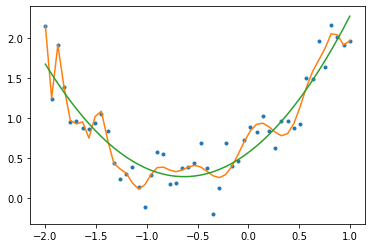

In [20]:
plt.plot(x,y,'.')
plt.plot(x,reg40.predict(X_poly40)) #오버피팅이라고 한다.
plt.plot(x,reg2.predict(X_poly2))
plt.plot(X,lasso_reg.predict(X_poly40))
plt.plot(X,ridge_reg.predict(X_poly40))

# Overfitting (과적합)★안하기..!
### 피하는 방법으론
# Regularization (정규화, 정칙화) -> penalty

$$ E(w) = (Y-Xw)^T(Y-Xw) $$

$$ E(w) = (Y-Xw)^T(Y-Xw)+\alpha \sum w_i $$
##### Lasso, Ridge

In [23]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [24]:
reg = LinearRegression()
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_poly40,y)

C:\Users\qkrgk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0649357390403105, tolerance: 0.0018405609680743255
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [25]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_poly40,y)

Ridge(alpha=0.01)

## 숙제!
#### 보스턴 데이터를 분석해서 깃허브에 분석 결과를 짧게 reg결과를 그래프나 숫자나 글로 표현할것. 인터넷 찾아해도 됨. 이 데이터 가지고 분석해봐라.
##### score는? 피팅의 corelation의 정도?이다. 0이면 상관이 없음, 1이면 라인 위에 모두 있다 생각할 수 있다. 신뢰도정도로 생각하면 될듯.